## Perceptron Trick

In [82]:
from sklearn.datasets import make_classification
import numpy as np


In [146]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant= 0, n_classes = 2, 
                         n_clusters_per_class=1, random_state=41, hypercube=False,class_sep=20 )

In [147]:
import matplotlib.pyplot as plt

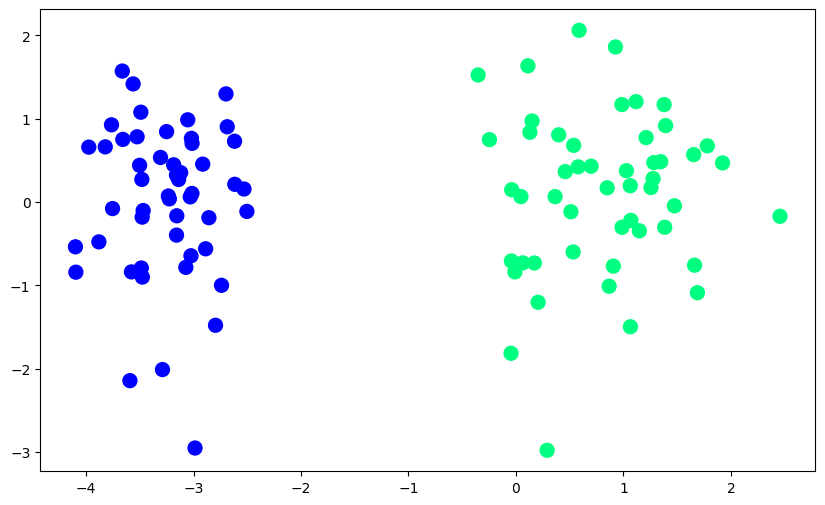

In [148]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap='winter', s=100)

In [149]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)   #adding 1 at 0th index as bias
    W = np.ones(X.shape[1])  # initializing weights 
    lr = 0.01   #learning rate
    for i in range(1000):
        idx = np.random.randint(0,100)  #picking randon student/index
        y_hat = step(np.dot(X[idx], W))   # y_hat will be 0/1
        W = W + lr * (y[idx]-y_hat) * X[idx]

    return W[0], W[1:]
        
        

In [150]:
def step(z):
    if z >= 0:
        return 1
    else:
        return 0

In [151]:
intercept_, coef_ = perceptron(X,y)

In [152]:
print(intercept_)  # W0 || C
print(coef_)       # W1, W2 || A,B

1.2100000000000002
[1.03069    0.47879154]


In [153]:
#converting Ax+By+C = 0 in terms of y=mx+b
# we get m = -(A/B) and b = -(C/B)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [154]:
print(m)
print(b)

-2.152690525669181
-2.5271958832113364


In [155]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

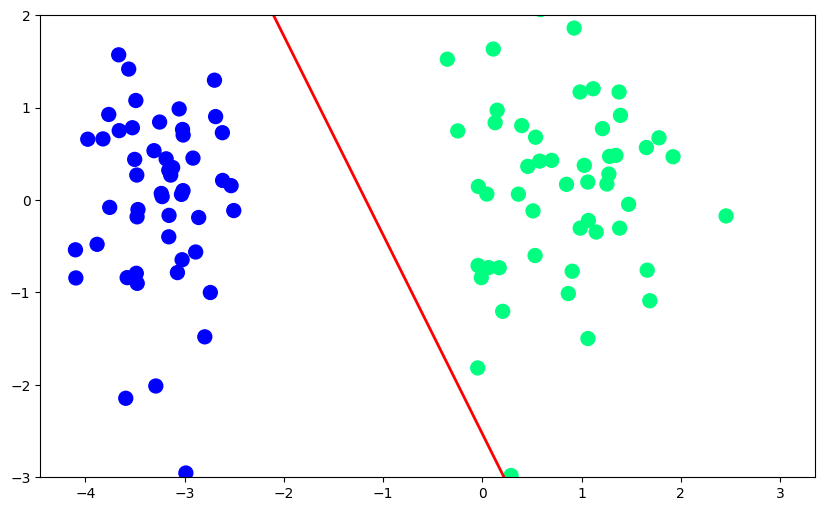

In [156]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2) #limit of y


## Using sklearn

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
lgr = LogisticRegression()

In [159]:
lgr.fit(X,y)

LogisticRegression()

In [160]:
print(lgr.intercept_)
print(lgr.coef_)

[3.13571596]
[[2.36679363 0.02300492]]


In [161]:
m_new = -(lgr.coef_[0][0]/lgr.coef_[0][1])
b_new = -(lgr.intercept_[0]/lgr.coef_[0][1])

In [162]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m_new*x_input + b_new

(-3.0, 2.0)

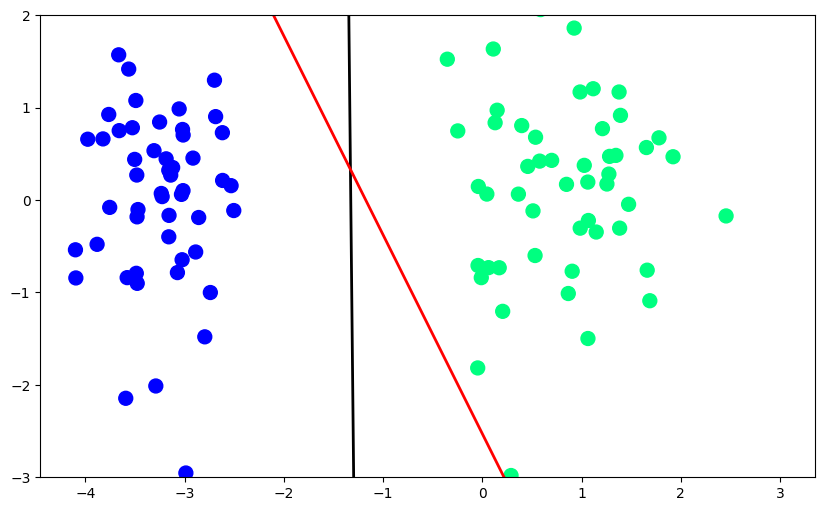

In [163]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1, color='black',linewidth=2)
plt.plot(x_input,y_input, color='red',linewidth=2)

plt.scatter(X[:,0],X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2) #limit of y

## Sigmoid Function

In [167]:
#changing stps with sigmoid
def usingSigmoid(X,y):
    X = np.insert(X,0,1,axis=1)   #adding 1 at 0th index as bias
    W = np.ones(X.shape[1])  # initializing weights 
    lr = 0.01   #learning rate
    for i in range(1000):
        idx = np.random.randint(0,100)  #picking randon student/index ---- (z)
        y_hat = sigmoid(np.dot(X[idx], W))   # y_hat will be 0/1
        W = W + lr * (y[idx]-y_hat) * X[idx]

    return W[0], W[1:]

In [168]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [169]:
intercept_, coef_ = usingSigmoid(X,y)

In [170]:
#converting Ax+By+C = 0 in terms of y=mx+b
# we get m = -(A/B) and b = -(C/B)

m_new_sig = -(coef_[0]/coef_[1])
b_new_sig = -(intercept_/coef_[1])

In [171]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m_new_sig*x_input + b_new_sig

(-3.0, 2.0)

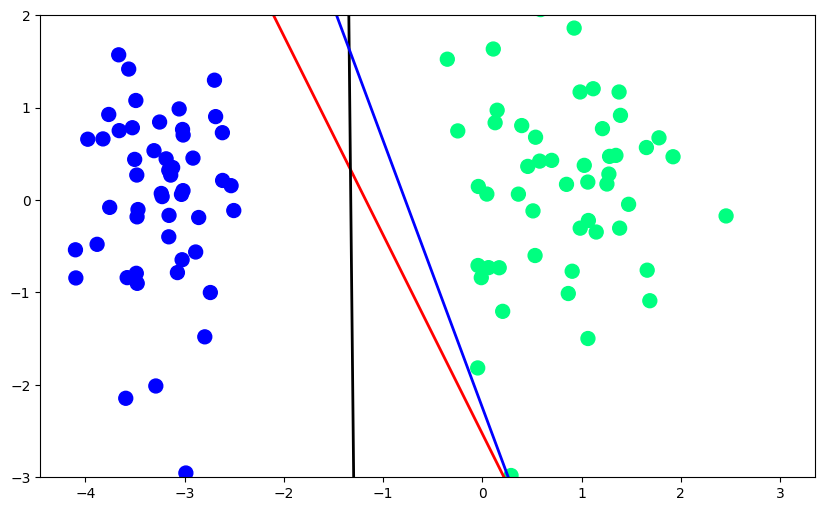

In [172]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color='red',linewidth=2)
plt.plot(x_input1,y_input1, color='black',linewidth=2)
plt.plot(x_input2,y_input2, color='blue',linewidth=2)

plt.scatter(X[:,0],X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2) #limit of y